I'll work with Kaggle dataset packed with works from the Poetry Foundation: 

The dataset contains 5 columns (features): Poem name, Author’s Name, Poem’s Content,  Age (era it was written: Renaissance or Modern), Type (Mythology+Folklore, Love, or Nature) 
I plan to use 2 Logistic Regression models separately to predict/classify my 2 targets: age and type.


$$yvariables (target features) = AGE (era it was written)$$
- renaissance
- modern
    
TYPE 
	- NATURE
	- MYTHOLOGY & FOLKLORE
	- LOVE


> X variables (non-target features) = 
Author’s Name 

`Author’s Poem Content`

Poem name

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
poetry = pd.read_csv('./all.csv') 

In [133]:
poetry.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [17]:
poetry.shape

(573, 5)

In [18]:
poetry.groupby('type').count()

,author,content,poem name,age
type,,,,
Love,326,326,326,326
Mythology & Folklore,59,59,58,59
Nature,188,188,187,188


In [25]:
poetry.groupby('age').count()

,author,content,poem name,type
age,,,,
Modern,258,258,256,258
Renaissance,315,315,315,315


In [128]:
author_count = poetry['author'].value_counts()
age_count = poetry['age'].value_counts()
type_count = poetry['type'].value_counts()

In [129]:
author_count

WILLIAM SHAKESPEARE                                 71
SIR PHILIP SIDNEY                                   42
JOHN DONNE                                          41
EDMUND SPENSER                                      34
WILLIAM BUTLER YEATS                                26
SIR THOMAS WYATT                                    22
CARL SANDBURG                                       16
EZRA POUND                                          16
THOMAS CAMPION                                      15
HART CRANE                                          14
SARA TEASDALE                                       14
WALLACE STEVENS                                     14
D. H. LAWRENCE                                      14
EN JONSON                                           13
PAUL LAURENCE DUNBAR                                12
LOUISE BOGAN                                        11
IVOR GURNEY                                         11
MICHAEL ANANIA                                      10
EDGAR LEE 

In [130]:
age_count

Renaissance    315
Modern         258
Name: age, dtype: int64

In [131]:
type_count

Love                    326
Nature                  188
Mythology & Folklore     59
Name: type, dtype: int64

In [134]:
author_name = []
unique_authors = poetry["author"].unique()
for name in unique_authors:
    author_name.append(name) 


In [135]:
author_counts = []
for count in author_count:
    author_counts.append(count)

In [136]:
data = {'author_name': author_name, 
        'author_counts': author_counts}
name_count = pd.DataFrame(data)
name_count.head()


,author_name,author_counts
0,WILLIAM SHAKESPEARE,71
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,42
2,THOMAS BASTARD,41
3,EDMUND SPENSER,34
4,RICHARD BARNFIELD,26


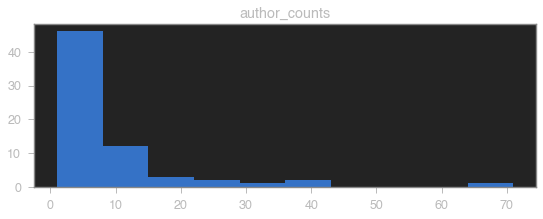

In [143]:
name_count.hist(grid=False, figsize=(9,3));

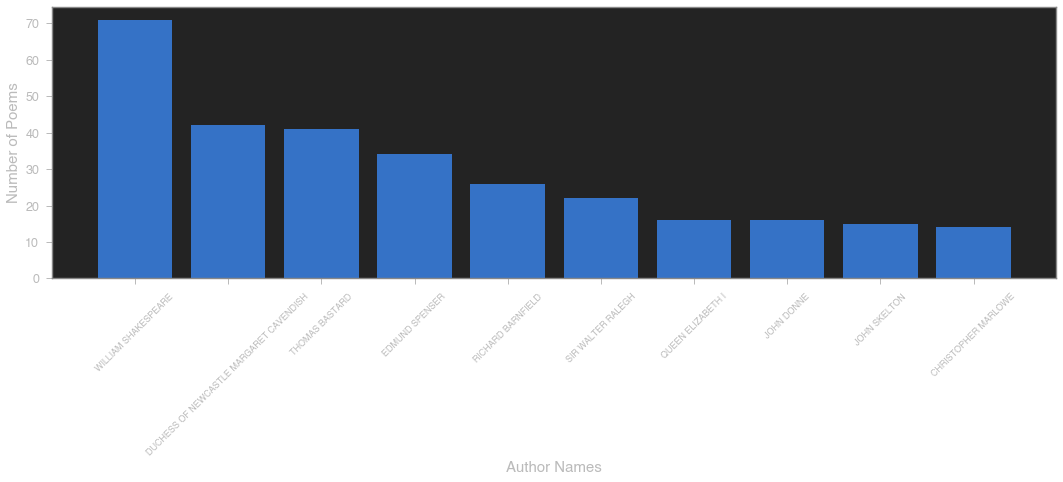

In [157]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,5))

index = np.arange(len(author_name))
plt.xticks(index, author_name, fontsize=9, rotation=45)
plt.bar(index[0:10], author_counts[0:10])

plt.xlabel('Author Names', fontsize=15)
plt.ylabel('Number of Poems', fontsize=15)
plt.show()

In [152]:
age_type = pd.crosstab(poetry['age'],poetry['type'],margins=True)

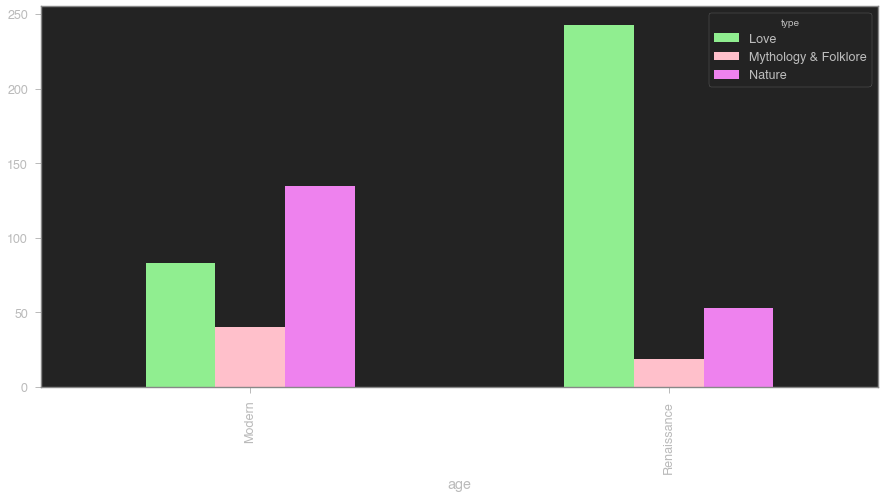

In [153]:
age_type.iloc[:-1,:-1].plot(kind='bar', color=['lightgreen','pink', 'violet'], figsize=(15,7))